## 信用卡欺诈检测

基于信用卡交易记录数据建立分类模型来预测哪些交易记录是异常的哪些是正常的。

### 任务流程：
* 加载数据，观察问题
* 针对问题给出解决方案
* 数据集切分
* 评估方法对比
* 逻辑回归模型
* 建模结果分析
* 方案效果对比

### 主要解决问题：
（1）在此项目中，我们首选对数据进行了观察，发现了其中样本不均衡的问题，其实我们做任务工作之前都一定要先进行数据检查，看看数据有什么问题，针对这些问题来选择解决方案。

（2）这里我们提出了两种方法，下采样和过采样，两条路线来进行对比实验，任何实际问题来了之后，我们都不会一条路走到黑的，没有对比就没有伤害，通常都会得到一个基础模型，然后对各种方法进行对比，找到最合适的，所以在任务开始之前，一定得多动脑筋多一手准备，得到的结果才有可选择的余地。

（3）在建模之前，需要对数据进行各种预处理的操作，比如数据标准化，缺失值填充等，这些都是必要操作，由于数据本身已经给定了特征，此处我们还没有提到特征工程这个概念，后续实战中我们会逐步引入，其实数据预处理的工作是整个任务中最为最重也是最苦的一个阶段，数据处理的好不好对结果的影响是最大的。

（4）先选好评估方法，再进行建模。建模的目的就是为了得到结果，但是我们不可能一次就得到最好的结果，肯定要尝试很多次，所以一定得有一个合适的评估方法，可以用这些通用的，比如Recall，准确率等，也可以根据实际问题自己指定评估指标。

（5）选择合适的算法，这里我们使用的是逻辑回归，也详细分析了其中的细节，这是因为我们刚刚讲解完逻辑回归的原理就拿它来练手了，之后我们还会讲解其他算法，并不一定非要用逻辑回归来完成这个任务，其他算法可能效果会更好。但是有一点我希望大家能够理解就是在机器学习中并不是越复杂的算法越实用，恰恰相反，越简单的算法反而应用的越广泛。逻辑回归就是其中一个典型的代表了，简单实用，所以任何分类问题都可以把逻辑回归当做一个待比较的基础模型了。

（6）模型的调参也是很重要的，之前我们通过实验也发现了不同的参数可能会对结果产生较大的影响，这一步也是必须的，后续实战内容我们还会来强调调参的细节，这里就简单概述一下了。对于参数我建立大家在使用工具包的时候先看看其API文档，知道每一个参数的意义，再来实验选择合适的参数值。

（7）得到的结果一定要和实际任务结合在一起，有时候虽然得到的结果指标还不错，但是实际应用却成了问题，所以测试环节也是必不可少的。到此，这个项目就给大家介绍到这里了，在实践中学习才能成长的更快，建议大家一定使用提供的Notebook代码文件来自己完成一遍上述操作。

导入我们的工具包

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

数据读取

In [3]:
data = pd.read_csv(r"data_set\creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


数据标签分布

In [4]:
pd.value_counts(data['Class'], sort=True).sort_index()

0    284315
1       492
Name: Class, dtype: int64

Text(0, 0.5, 'Frequency')

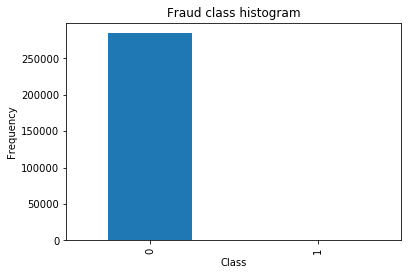

In [5]:
count_classes = pd.value_counts(data['Class'], sort=True).sort_index()
count_classes.plot(kind='bar')
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

数据标准化处理

In [7]:
from sklearn.preprocessing import StandardScaler

data['normAmount'] = StandardScaler().fit_transform(
    data['Amount'].values.reshape(-1, 1))
data = data.drop(['Time', 'Amount'], axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


下采样方案

In [8]:
data[data.Class == 1].index

Int64Index([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
              6338,   6427,
            ...
            274382, 274475, 275992, 276071, 276864, 279863, 280143, 280149,
            281144, 281674],
           dtype='int64', length=492)

In [9]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

# 得到所有异常样本的索引
number_records_fraud = len(data[data.Class == 1])
fraud_indices = np.array(data[data.Class == 1].index)

# 得到所有正常样本的索引
normal_indices = data[data.Class == 0].index

# 在正常样本中随机采样出指定个数的样本，并取其索引
random_normal_indices = np.random.choice(normal_indices,
                                         number_records_fraud,
                                         replace=False)
random_normal_indices = np.array(random_normal_indices)

# 有了正常和异常样本后把它们的索引都拿到手
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])

# 根据索引得到下采样所有样本点
under_sample_data = data.iloc[under_sample_indices, :]

X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

# 下采样 样本比例
print(
    "正常样本所占整体比例: ",
    len(under_sample_data[under_sample_data.Class == 0]) /
    len(under_sample_data))
print(
    "异常样本所占整体比例: ",
    len(under_sample_data[under_sample_data.Class == 1]) /
    len(under_sample_data))
print("下采样策略总体样本数量: ", len(under_sample_data))

正常样本所占整体比例:  0.5
异常样本所占整体比例:  0.5
下采样策略总体样本数量:  984


数据集划分

In [10]:
from sklearn.model_selection import train_test_split

# 整个数据集进行划分
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0)

print("原始训练集包含样本数量: ", len(X_train))
print("原始测试集包含样本数量: ", len(X_test))
print("原始样本总数: ", len(X_train) + len(X_test))

# 下采样数据集进行划分
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(
    X_undersample, y_undersample, test_size=0.3, random_state=0)
print("")
print("下采样训练集包含样本数量: ", len(X_train_undersample))
print("下采样测试集包含样本数量: ", len(X_test_undersample))
print("下采样样本总数: ", len(X_train_undersample) + len(X_test_undersample))

原始训练集包含样本数量:  199364
原始测试集包含样本数量:  85443
原始样本总数:  284807

下采样训练集包含样本数量:  688
下采样测试集包含样本数量:  296
下采样样本总数:  984


逻辑回归模型

In [13]:
#Recall = TP/(TP+FN)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix, recall_score, classification_report
from sklearn.model_selection import cross_val_predict

In [14]:
def printing_Kfold_scores(x_train_data, y_train_data):
    fold = KFold(5, shuffle=False)

    # 定义不同力度的正则化惩罚力度
    c_param_range = [0.01, 0.1, 1, 10, 100]
    # 展示结果用的表格
    results_table = pd.DataFrame(index=range(len(c_param_range), 2),
                                 columns=['C_parameter', 'Mean recall score'])
    results_table['C_parameter'] = c_param_range

    # k-fold 表示K折的交叉验证，这里会得到两个索引集合: 训练集 = indices[0], 验证集 = indices[1]
    j = 0
    #循环遍历不同的参数
    for c_param in c_param_range:
        print('-------------------------------------------')
        print('正则化惩罚力度: ', c_param)
        print('-------------------------------------------')
        print('')

        recall_accs = []

        #一步步分解来执行交叉验证
        for iteration, indices in enumerate(fold.split(x_train_data)):

            # 指定算法模型，并且给定参数
            lr = LogisticRegression(C=c_param,
                                    penalty='l1',
                                    solver='liblinear',
                                    n_jobs=-1)

            # 训练模型，注意索引不要给错了，训练的时候一定传入的是训练集，所以X和Y的索引都是0
            lr.fit(x_train_data.iloc[indices[0], :],
                   y_train_data.iloc[indices[0], :].values.ravel())

            # 建立好模型后，预测模型结果，这里用的就是验证集，索引为1
            y_pred_undersample = lr.predict(
                x_train_data.iloc[indices[1], :].values)

            # 有了预测结果之后就可以来进行评估了，这里recall_score需要传入预测值和真实值。
            recall_acc = recall_score(y_train_data.iloc[indices[1], :].values,
                                      y_pred_undersample)
            # 一会还要算平均，所以把每一步的结果都先保存起来。
            recall_accs.append(recall_acc)
            print('Iteration ', iteration, ': 召回率 = ', recall_acc)

        # 当执行完所有的交叉验证后，计算平均结果
        results_table.loc[j, 'Mean recall score'] = np.mean(recall_accs)
        j += 1
        print('')
        print('平均召回率 ', np.mean(recall_accs))
        print('')

    #找到最好的参数，哪一个Recall高，自然就是最好的了。
    best_c = results_table.loc[results_table['Mean recall score'].astype(
        'float32').idxmax()]['C_parameter']

    # 打印最好的结果
    print(
        '*********************************************************************************'
    )
    print('效果最好的模型所选参数 = ', best_c)
    print(
        '*********************************************************************************'
    )

    return best_c

交叉验证与不同参数结果

In [15]:
best_c = printing_Kfold_scores(X_train_undersample, y_train_undersample)

-------------------------------------------
正则化惩罚力度:  0.01
-------------------------------------------

Iteration  0 : 召回率 =  0.9315068493150684
Iteration  1 : 召回率 =  0.9178082191780822
Iteration  2 : 召回率 =  0.9830508474576272
Iteration  3 : 召回率 =  0.972972972972973
Iteration  4 : 召回率 =  0.9545454545454546

平均召回率  0.9519768686938409

-------------------------------------------
正则化惩罚力度:  0.1
-------------------------------------------

Iteration  0 : 召回率 =  0.8493150684931506
Iteration  1 : 召回率 =  0.863013698630137
Iteration  2 : 召回率 =  0.9491525423728814
Iteration  3 : 召回率 =  0.9459459459459459
Iteration  4 : 召回率 =  0.9090909090909091

平均召回率  0.9033036329066049

-------------------------------------------
正则化惩罚力度:  1
-------------------------------------------

Iteration  0 : 召回率 =  0.863013698630137
Iteration  1 : 召回率 =  0.8904109589041096
Iteration  2 : 召回率 =  0.9661016949152542
Iteration  3 : 召回率 =  0.9459459459459459
Iteration  4 : 召回率 =  0.9090909090909091

平均召回率  0.91491264149727

混淆矩阵

In [16]:
def plot_confusion_matrix(cm,
                          classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    绘制混淆矩阵
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,
                 i,
                 cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

召回率:  0.9183673469387755


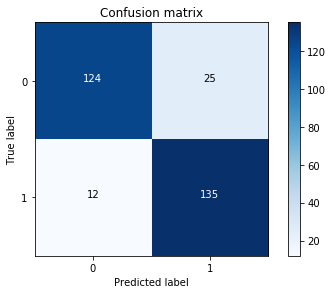

In [18]:
import itertools
lr = LogisticRegression(C=best_c, penalty='l1', solver='liblinear')
lr.fit(X_train_undersample, y_train_undersample.values.ravel())
y_pred_undersample = lr.predict(X_test_undersample.values)

# 计算所需值
cnf_matrix = confusion_matrix(y_test_undersample, y_pred_undersample)
np.set_printoptions(precision=2)

print("召回率: ", cnf_matrix[1, 1] / (cnf_matrix[1, 0] + cnf_matrix[1, 1]))

# 绘制
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

下采样方案在原始数据集中的结果

召回率:  0.9115646258503401


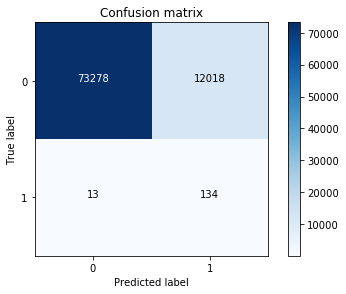

In [19]:
lr = LogisticRegression(C=best_c, penalty='l1', solver='liblinear')
lr.fit(X_train_undersample, y_train_undersample.values.ravel())
y_pred = lr.predict(X_test.values)

# 计算所需值
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

print("召回率: ", cnf_matrix[1, 1] / (cnf_matrix[1, 0] + cnf_matrix[1, 1]))

# 绘制
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

阈值对结果的影响

给定阈值为: 0.1 时测试集召回率:  1.0
给定阈值为: 0.2 时测试集召回率:  1.0
给定阈值为: 0.3 时测试集召回率:  1.0
给定阈值为: 0.4 时测试集召回率:  0.9727891156462585
给定阈值为: 0.5 时测试集召回率:  0.9183673469387755
给定阈值为: 0.6 时测试集召回率:  0.891156462585034
给定阈值为: 0.7 时测试集召回率:  0.8299319727891157
给定阈值为: 0.8 时测试集召回率:  0.782312925170068
给定阈值为: 0.9 时测试集召回率:  0.6054421768707483


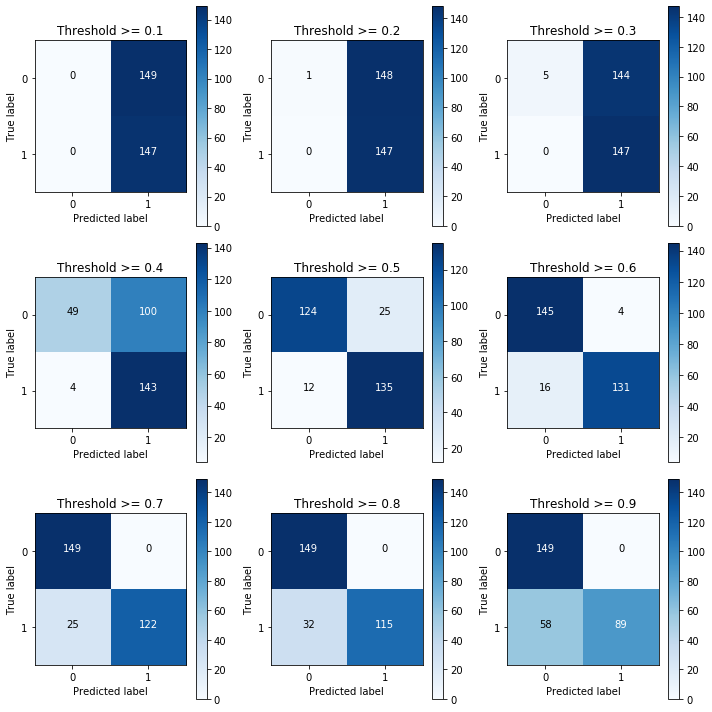

In [20]:
# 用之前最好的参数来进行建模
lr = LogisticRegression(C=0.01, penalty='l1', solver='liblinear')

# 训练模型，还是用下采样的数据集
lr.fit(X_train_undersample, y_train_undersample.values.ravel())

# 得到预测结果的概率值
y_pred_undersample_proba = lr.predict_proba(X_test_undersample.values)

#指定不同的阈值
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

plt.figure(figsize=(10, 10))

j = 1

# 用混淆矩阵来进行展示
for i in thresholds:
    y_test_predictions_high_recall = y_pred_undersample_proba[:, 1] > i

    plt.subplot(3, 3, j)
    j += 1

    cnf_matrix = confusion_matrix(y_test_undersample,
                                  y_test_predictions_high_recall)
    np.set_printoptions(precision=2)

    print("给定阈值为:", i, "时测试集召回率: ",
          cnf_matrix[1, 1] / (cnf_matrix[1, 0] + cnf_matrix[1, 1]))

    class_names = [0, 1]
    plot_confusion_matrix(cnf_matrix,
                          classes=class_names,
                          title='Threshold >= %s' % i)

### SMOTE过采样方案

In [21]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [22]:
credit_cards = pd.read_csv(r'data_set\creditcard.csv')
credit_cards['normAmount'] = StandardScaler().fit_transform(
    credit_cards['Amount'].values.reshape(-1, 1))
credit_cards = credit_cards.drop(['Time', 'Amount'], axis=1)
credit_cards.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [23]:
columns = credit_cards.columns
# 在特征中去除掉标签
# features_columns=columns.delete(len(columns)-1)
# features=credit_cards[features_columns]
# labels=credit_cards['Class']

features = credit_cards.iloc[:, credit_cards.columns != 'Class']
labels = credit_cards.iloc[:, credit_cards.columns == 'Class']

In [24]:
features.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [25]:
labels

,Class
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


In [26]:
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.3, random_state=0)

基于SMOTE算法来进行样本生成，这样正例和负例样本数量就是一致的了

In [27]:
oversampler = SMOTE(random_state=0)
os_features, os_labels = oversampler.fit_sample(features_train, labels_train)

In [28]:
os_features

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normAmount
0,-0.132066,0.107044,-0.650588,-0.996032,1.814333,1.740740,0.496852,0.633016,0.017181,-0.362707,...,-0.062612,-0.062489,0.005292,0.251519,-2.466810,-0.889690,0.337462,0.306395,0.074817,-0.161761
1,2.125994,0.014207,-1.514760,0.115021,0.598510,-0.333235,0.199289,-0.264353,0.384111,0.028747,...,-0.086076,-0.329368,-0.788150,0.267730,0.066122,-0.135785,0.203841,-0.068267,-0.057678,-0.345313
2,-0.086694,0.166240,1.573127,0.687266,0.222359,1.102606,1.575093,-1.098608,0.763887,1.404677,...,0.052960,0.015324,1.063663,-0.410841,0.722723,-0.171733,-0.613543,-1.201571,-1.139931,0.326845
3,1.352339,-0.534984,0.555143,-0.629355,-1.144170,-0.852967,-0.642128,-0.032659,-0.654482,0.619206,...,-0.066712,-0.014814,-0.180379,0.178112,0.347720,0.151810,-0.404361,0.013746,0.016152,-0.329401
4,-1.526760,0.647782,0.615391,-0.561114,0.836950,-0.514251,0.984325,-0.097430,-0.062634,-1.033567,...,-0.073333,-0.221533,-0.393158,-0.214990,0.588447,0.679496,0.518434,0.065022,0.147294,0.006398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398033,-4.400614,2.522843,-4.058515,1.253387,-2.436222,-1.364969,-4.135492,1.297244,1.040595,-4.564528,...,-1.002860,1.295306,0.144122,0.480098,-0.246770,0.129419,0.039845,-0.891960,0.342245,-0.308057
398034,-5.408175,2.804722,-4.270397,0.628509,-0.321327,0.633023,-5.093660,-7.751164,0.207220,-2.217156,...,-2.564065,8.483315,-2.679096,0.440417,0.081581,0.325653,0.532413,0.183712,0.442904,-0.349285
398035,-0.967835,3.546769,-6.535876,3.898759,-0.610641,-2.144004,-2.598312,1.105141,-2.785718,-4.832190,...,0.435165,1.103089,1.160807,-0.014172,0.241850,-1.021108,0.013869,0.631997,0.557451,-0.292516
398036,-0.708473,-1.414330,-1.083198,1.923835,-0.956489,0.372932,2.228012,-0.216082,0.123434,-1.104359,...,1.545118,0.462910,0.534941,1.469795,0.350652,-0.167540,-0.260970,-0.173541,-0.026476,2.140693


训练集样本数量

In [29]:
len(os_labels[os_labels == 1])

398038

In [30]:
os_features = pd.DataFrame(os_features)
os_labels = pd.DataFrame(os_labels)
best_c = printing_Kfold_scores(os_features, os_labels)

-------------------------------------------
正则化惩罚力度:  0.01
-------------------------------------------

Iteration  0 : 召回率 =  0.9285714285714286
Iteration  1 : 召回率 =  0.912
Iteration  2 : 召回率 =  0.9130247850278199
Iteration  3 : 召回率 =  0.8972954639667365
Iteration  4 : 召回率 =  0.8973833959325185

平均召回率  0.9096550146997007

-------------------------------------------
正则化惩罚力度:  0.1
-------------------------------------------

Iteration  0 : 召回率 =  0.9285714285714286
Iteration  1 : 召回率 =  0.92
Iteration  2 : 召回率 =  0.9144663631765301
Iteration  3 : 召回率 =  0.8986521285816574
Iteration  4 : 召回率 =  0.8988656776414135

平均召回率  0.912111119594206

-------------------------------------------
正则化惩罚力度:  1
-------------------------------------------

Iteration  0 : 召回率 =  0.9285714285714286
Iteration  1 : 召回率 =  0.92
Iteration  2 : 召回率 =  0.914693980778958
Iteration  3 : 召回率 =  0.8987777456756315
Iteration  4 : 召回率 =  0.8989536096071954

平均召回率  0.9121993529266428

------------------------------------

召回率:  0.9183673469387755


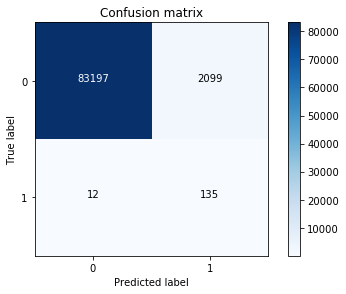

In [31]:
lr = LogisticRegression(C=best_c, penalty='l1', solver='liblinear')
lr.fit(os_features, os_labels.values.ravel())
y_pred = lr.predict(features_test.values)

# 计算混淆矩阵
cnf_matrix = confusion_matrix(labels_test, y_pred)
np.set_printoptions(precision=2)

print("召回率: ", cnf_matrix[1, 1] / (cnf_matrix[1, 0] + cnf_matrix[1, 1]))

# 绘制
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

In [32]:
credit_cards = pd.read_csv(r'data_set\creditcard.csv')

columns = credit_cards.columns
# 在特征中去除掉标签
features_columns = columns.delete(len(columns) - 1)

features = credit_cards[features_columns]
labels = credit_cards['Class']

In [33]:
features_train, features_test, labels_train, labels_test = train_test_split(
    features, labels, test_size=0.3, random_state=0)

In [34]:
oversampler = SMOTE(random_state=0)
os_features, os_labels = oversampler.fit_sample(features_train, labels_train)

In [35]:
os_features = pd.DataFrame(os_features)
os_labels = pd.DataFrame(os_labels)
best_c = printing_Kfold_scores(os_features, os_labels)

-------------------------------------------
正则化惩罚力度:  0.01
-------------------------------------------

Iteration  0 : 召回率 =  0.9142857142857143
Iteration  1 : 召回率 =  0.88
Iteration  2 : 召回率 =  0.9716489630753667
Iteration  3 : 召回率 =  0.9601668195007976
Iteration  4 : 召回率 =  0.9618877736882435

平均召回率  0.9375978541100244

-------------------------------------------
正则化惩罚力度:  0.1
-------------------------------------------

Iteration  0 : 召回率 =  0.9142857142857143
Iteration  1 : 召回率 =  0.88
Iteration  2 : 召回率 =  0.9728882144663632
Iteration  3 : 召回率 =  0.9638850854824325
Iteration  4 : 召回率 =  0.964023264285804

平均召回率  0.9390164557040628

-------------------------------------------
正则化惩罚力度:  1
-------------------------------------------

Iteration  0 : 召回率 =  0.9142857142857143
Iteration  1 : 召回率 =  0.88
Iteration  2 : 召回率 =  0.9730399595346485
Iteration  3 : 召回率 =  0.9638850854824325
Iteration  4 : 召回率 =  0.9642493750549574

平均召回率  0.9390920268715505

------------------------------------

召回率:  0.8775510204081632


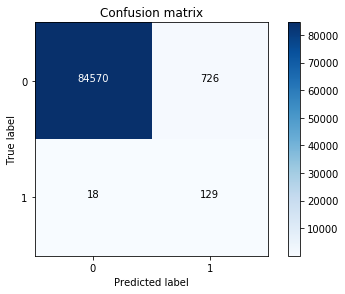

In [37]:
lr = LogisticRegression(C=best_c, penalty='l1', solver='liblinear', n_jobs=-1)
lr.fit(os_features, os_labels.values.ravel())
y_pred = lr.predict(features_test.values)

# 计算混淆矩阵
cnf_matrix = confusion_matrix(labels_test, y_pred)
np.set_printoptions(precision=2)

print("召回率: ", cnf_matrix[1, 1] / (cnf_matrix[1, 0] + cnf_matrix[1, 1]))

# 绘制
class_names = [0, 1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

### 项目总结

（1）在此项目中，我们首选对数据进行了观察，发现了其中样本不均衡的问题，其实我们做任务工作之前都一定要先进行数据检查，看看数据有什么问题，针对这些问题来选择解决方案。

（2）这里我们提出了两种方法，下采样和过采样，两条路线来进行对比实验，任何实际问题来了之后，我们都不会一条路走到黑的，没有对比就没有伤害，通常都会得到一个基础模型，然后对各种方法进行对比，找到最合适的，所以在任务开始之前，一定得多动脑筋多一手准备，得到的结果才有可选择的余地。

（3）在建模之前，需要对数据进行各种预处理的操作，比如数据标准化，缺失值填充等，这些都是必要操作，由于数据本身已经给定了特征，此处我们还没有提到特征工程这个概念，后续实战中我们会逐步引入，其实数据预处理的工作是整个任务中最为最重也是最苦的一个阶段，数据处理的好不好对结果的影响是最大的。

（4）先选好评估方法，再进行建模。建模的目的就是为了得到结果，但是我们不可能一次就得到最好的结果，肯定要尝试很多次，所以一定得有一个合适的评估方法，可以用这些通用的，比如Recall，准确率等，也可以根据实际问题自己指定评估指标。

（5）选择合适的算法，这里我们使用的是逻辑回归，也详细分析了其中的细节，这是因为我们刚刚讲解完逻辑回归的原理就拿它来练手了，之后我们还会讲解其他算法，并不一定非要用逻辑回归来完成这个任务，其他算法可能效果会更好。但是有一点我希望大家能够理解就是在机器学习中并不是越复杂的算法越实用，恰恰相反，越简单的算法反而应用的越广泛。逻辑回归就是其中一个典型的代表了，简单实用，所以任何分类问题都可以把逻辑回归当做一个待比较的基础模型了。

（6）模型的调参也是很重要的，之前我们通过实验也发现了不同的参数可能会对结果产生较大的影响，这一步也是必须的，后续实战内容我们还会来强调调参的细节，这里就简单概述一下了。对于参数我建立大家在使用工具包的时候先看看其API文档，知道每一个参数的意义，再来实验选择合适的参数值。

（7）得到的结果一定要和实际任务结合在一起，有时候虽然得到的结果指标还不错，但是实际应用却成了问题，所以测试环节也是必不可少的。到此，这个项目就给大家介绍到这里了，在实践中学习才能成长的更快，建议大家一定使用提供的Notebook代码文件来自己完成一遍上述操作。